In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [ ]:
#Calculamos el numero total de la población "n"

Milan['number_of_reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [4]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['number_of_reviews'].max()
Min = Milan['number_of_reviews'].min()
Limites = [Min, Max]
Limites

[0.0, 275.0]

In [5]:
# Calculamos el rango R
R = Max - Min
R

275.0

In [6]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [7]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

17.71390238785637

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [8]:
# Categorización de variables
intervalos = np.linspace (0, 275, 16)
intervalos

array([  0.        ,  18.33333333,  36.66666667,  55.        ,
        73.33333333,  91.66666667, 110.        , 128.33333333,
       146.66666667, 165.        , 183.33333333, 201.66666667,
       220.        , 238.33333333, 256.66666667, 275.        ])

In [9]:
# Creamos las categorías
categorias = [
    "Sin reseñas",
    "Reseñas muy pocas",
    "Pocas reseñas",
    "Reseñas limitadas",
    "Reseñas iniciales",
    "Reseñas moderadas",
    "Reseñas regulares",
    "Reseñas en crecimiento",
    "Reseñas considerables",
    "Reseñas buenas",
    "Reseñas muy buenas",
    "Reseñas sobresalientes",
    "Reseñas excepcionales",
    "Reseñas destacadas",
    "Reseñas máximas"
]

In [10]:
# Creamos las ctegorias en la columna numerica
Milan['number_of_reviews'] = pd.cut ( x = Milan ['number_of_reviews'], bins = intervalos, labels = categorias )
Milan['number_of_reviews']

0              Sin reseñas
1        Reseñas muy pocas
2            Pocas reseñas
3            Pocas reseñas
4              Sin reseñas
               ...        
23700                  NaN
23701                  NaN
23702                  NaN
23703                  NaN
23704                  NaN
Name: number_of_reviews, Length: 23705, dtype: category
Categories (15, object): ['Sin reseñas' < 'Reseñas muy pocas' < 'Pocas reseñas' < 'Reseñas limitadas' ... 'Reseñas sobresalientes' < 'Reseñas excepcionales' < 'Reseñas destacadas' < 'Reseñas máximas']

In [11]:
table1 = freq_tbl(Milan['number_of_reviews'])
table1

,number_of_reviews,frequency,percentage,cumulative_perc
0,Sin reseñas,10955,0.462139,0.555330
1,Reseñas muy pocas,3611,0.152331,0.738379
2,Pocas reseñas,1660,0.070027,0.822528
3,Reseñas limitadas,935,0.039443,0.869924
4,Reseñas iniciales,641,0.027041,0.902418
5,Reseñas moderadas,461,0.019447,0.925787
6,Reseñas regulares,328,0.013837,0.942414
7,Reseñas en crecimiento,256,0.010799,0.955391
8,Reseñas considerables,211,0.008901,0.966087
9,Reseñas buenas,159,0.006707,0.974147


In [12]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,number_of_reviews,frequency
0,Sin reseñas,10955
1,Reseñas muy pocas,3611
2,Pocas reseñas,1660
3,Reseñas limitadas,935
4,Reseñas iniciales,641
5,Reseñas moderadas,461
6,Reseñas regulares,328
7,Reseñas en crecimiento,256
8,Reseñas considerables,211
9,Reseñas buenas,159


In [13]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('number_of_reviews')
Filtro_index

,frequency
number_of_reviews,
Sin reseñas,10955
Reseñas muy pocas,3611
Pocas reseñas,1660
Reseñas limitadas,935
Reseñas iniciales,641
Reseñas moderadas,461
Reseñas regulares,328
Reseñas en crecimiento,256
Reseñas considerables,211


Text(0, 0.5, 'Frecuencia')

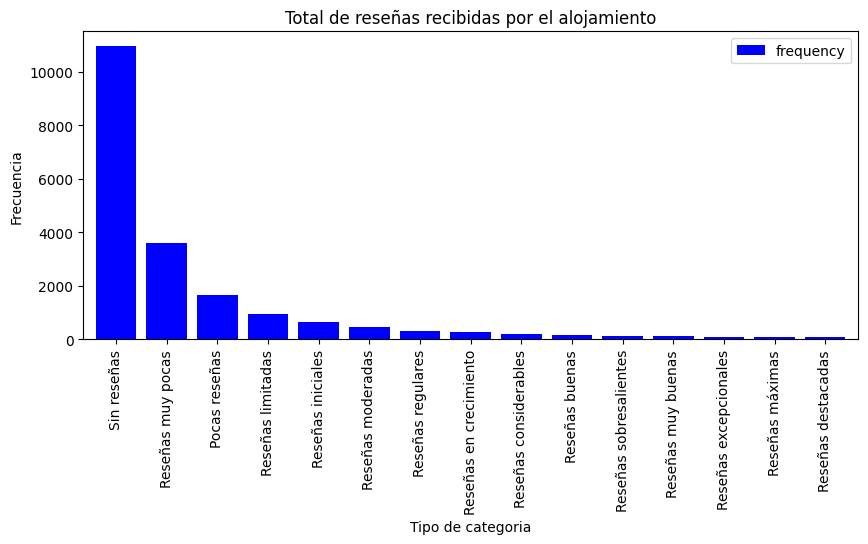

In [14]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Total de reseñas recibidas por el alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')